In [70]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Cleaning

In [2]:
## loading in the training data
## original df

train_ames = pd.read_csv('./data/train.csv')
train_ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
## loading in testing data
## original df
test_ames = pd.read_csv("./data/test.csv")
test_ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
train_ames.shape

(2051, 81)

In [5]:
test_ames.shape

(878, 80)

In [6]:
### What column is in train that is not in test set?

set(train_ames) - set(test_ames)

{'SalePrice'}

In [7]:
## set Id column to be our new index for both training and test
train_ames.set_index("Id", inplace=True)
test_ames.set_index("Id", inplace=True)

#### Checking for missing values

In [8]:
## checking for null values in training set
train_ames.isnull().sum().sort_values(ascending=False)

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 80, dtype: int64

In [9]:
## there are too many columns to see which columns are missing values
## creating a function that shows exactly which columns have missing values
def missing_values(df):
    lst = []
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            lst.append(column)
    return lst

In [10]:
missing_values(train_ames)

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [11]:
## another way to check for missing values
train_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

### Processing numeric data

In [12]:
### creating a dataframe containing only the numeric data
numeric_df = train_ames._get_numeric_data()
numeric_df.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,NaN,13517,6,8,1976,2005,289.0,533.0,...,0,44,0,0,0,0,0,3,2010,130500
544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,...,0,74,0,0,0,0,0,4,2009,220000
153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,...,0,52,0,0,0,0,0,1,2010,109000
318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500


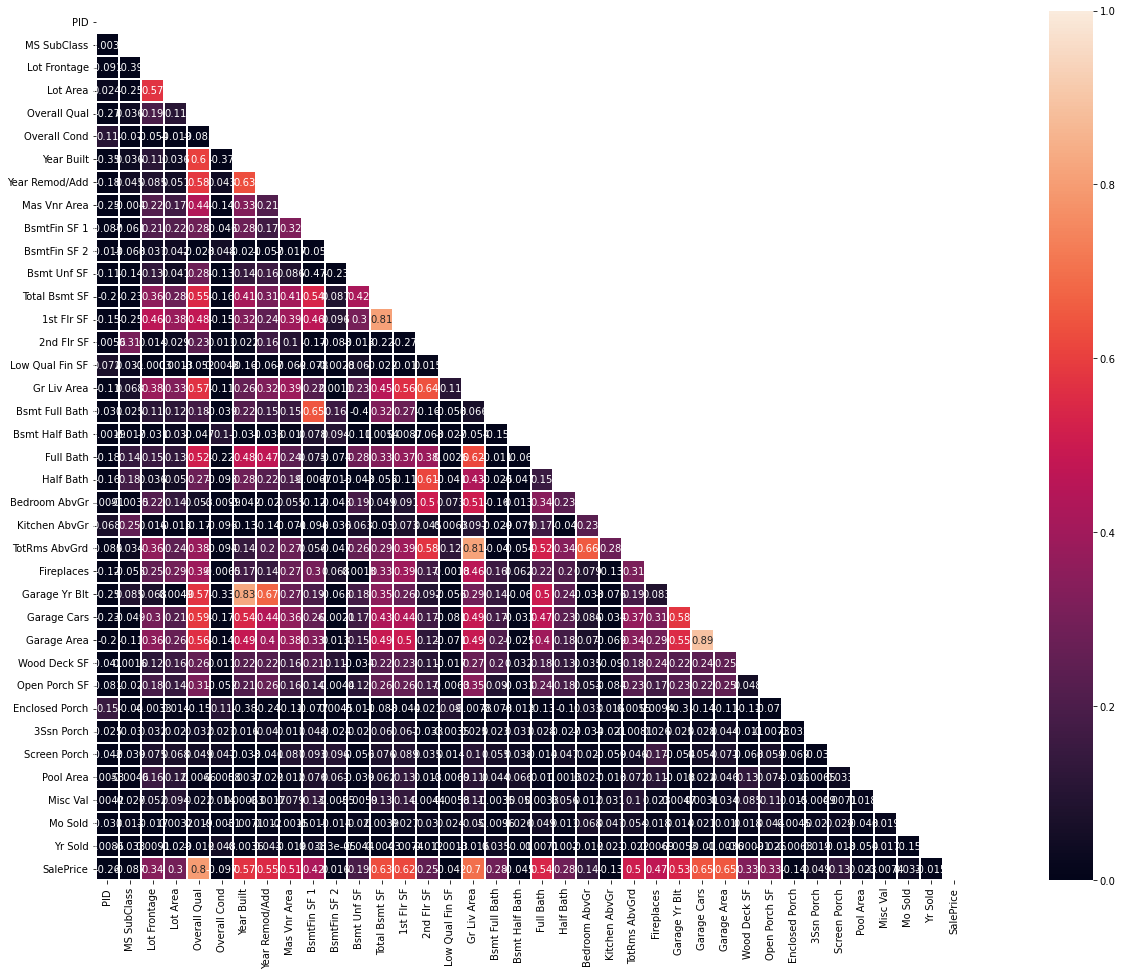

In [13]:
plt.figure(figsize = (30,16))
corr = numeric_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, square = True, annot = True, linewidth=0.05, vmin=0, vmax=1);

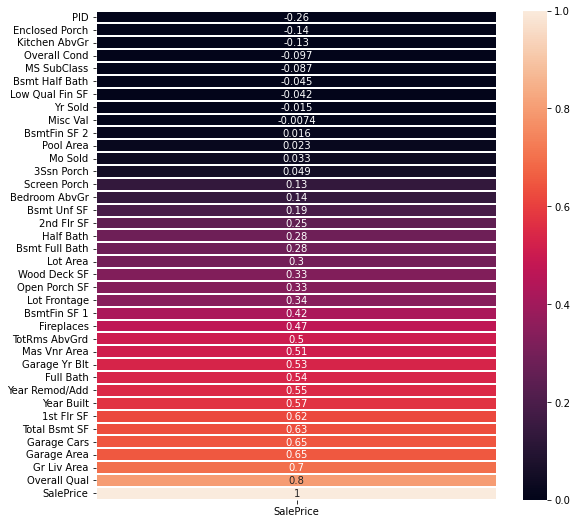

In [14]:
## Correlaton matrix for sale price column
plt.figure(figsize = (9,9))
sale_corr = numeric_df.corr()[['SalePrice']].sort_values('SalePrice')
sns.heatmap(sale_corr, annot = True, linewidth = 0.05, vmin = 0, vmax = 1);

In [15]:
## creating a seperate df for all of the numeric features I will use in the model
## only using corr values greater than 0.50
feats = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF','Gr Liv Area', 
         'Full Bath','TotRms AbvGrd', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice']
final_num_features = numeric_df[feats].copy()

In [16]:
final_num_features.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
Id,,,,,,,,,,,,,
109,6,1976,2005,289.0,725.0,725,1479,2,6,1976.0,2.0,475.0,130500
544,7,1996,1997,132.0,913.0,913,2122,2,8,1997.0,2.0,559.0,220000
153,5,1953,2007,0.0,1057.0,1057,1057,1,5,1953.0,1.0,246.0,109000
318,5,2006,2007,0.0,384.0,744,1444,2,7,2007.0,2.0,400.0,174000
255,6,1900,1993,0.0,676.0,831,1445,2,6,1957.0,2.0,484.0,138500


Fixing column names

In [17]:
## making column names lowercase
final_num_features.columns = map(str.lower, final_num_features.columns)

## replacing whitespace with underscore in column name
final_num_features.columns = final_num_features.columns.str.replace(' ','_')

#### Outliers

In [18]:
final_num_features.describe()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area,saleprice
count,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000
mean,6.112140,1971.708922,1984.190151,99.695909,1057.987805,1164.488055,1499.330083,1.577279,6.435885,1978.707796,1.776585,473.671707,181469.701609
std,1.426271,30.177889,21.036250,174.963129,449.410704,396.446923,500.447829,0.549279,1.560225,25.441094,0.764537,215.934561,79258.659352
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,1895.000000,0.000000,0.000000,12789.000000
25%,5.000000,1953.500000,1964.500000,0.000000,793.000000,879.500000,1129.000000,1.000000,5.000000,1961.000000,1.000000,319.000000,129825.000000
50%,6.000000,1974.000000,1993.000000,0.000000,994.500000,1093.000000,1444.000000,2.000000,6.000000,1980.000000,2.000000,480.000000,162500.000000
75%,7.000000,2001.000000,2004.000000,161.000000,1318.750000,1405.000000,1728.500000,2.000000,7.000000,2002.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,5095.000000,5642.000000,4.000000,15.000000,2207.000000,5.000000,1418.000000,611657.000000


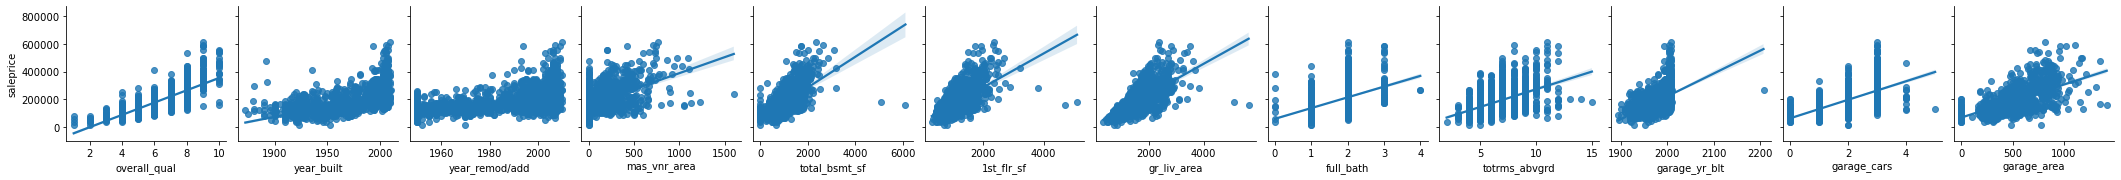

In [19]:
## checking for outliers visually before I take care of missing values 
sns.pairplot(data=final_num_features, y_vars =['saleprice'], x_vars = ['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath',
       'totrms_abvgrd', 'garage_yr_blt', 'garage_cars', 'garage_area'], 
        kind='reg');


**Notes:** There are outliers in garage_yr_blt, gr_living_area, first_flr_sf, and total_bsmt_sf. I will take a look at those columns below

Garage Year Built

In [20]:
final_num_features[ final_num_features ['garage_yr_blt'] == 2207 ] 
## because garage_yr_blt has only one outlier and I don't necessarily need this one data point, I will drop this row. 
## I will have to drop this same row in the test set

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area,saleprice
Id,,,,,,,,,,,,,
2261,8,2006,2007,NaN,1546.0,1564,1564,2,6,2207.0,2.0,502.0,267300


In [21]:
final_num_features.drop(index=2261, axis = 0, inplace=True)

Garage Living Area

In [22]:
final_num_features[final_num_features['gr_liv_area'] > 4000]
## these two outliers I am going to delete. will also delete these in the test set

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area,saleprice
Id,,,,,,,,,,,,,
1499,10,2008,2008,796.0,6110.0,4692,5642,2,12,2008.0,2.0,1418.0,160000
2181,10,2008,2009,1224.0,5095.0,5095,5095,2,15,2008.0,3.0,1154.0,183850


In [23]:
final_num_features.drop(index =[1499,2181], axis = 0, inplace=True)

deleting the three outliers above gets rid of the other outliers in total_bsmt_sf and first_fl_sf

### Imputing Missing Values

In [24]:
final_num_features.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area,saleprice
Id,,,,,,,,,,,,,
109,6,1976,2005,289.0,725.0,725,1479,2,6,1976.0,2.0,475.0,130500
544,7,1996,1997,132.0,913.0,913,2122,2,8,1997.0,2.0,559.0,220000
153,5,1953,2007,0.0,1057.0,1057,1057,1,5,1953.0,1.0,246.0,109000
318,5,2006,2007,0.0,384.0,744,1444,2,7,2007.0,2.0,400.0,174000
255,6,1900,1993,0.0,676.0,831,1445,2,6,1957.0,2.0,484.0,138500


In [25]:
missing_values(final_num_features)

['mas_vnr_area',
 'total_bsmt_sf',
 'garage_yr_blt',
 'garage_cars',
 'garage_area']

In [26]:
final_num_features['mas_vnr_area'].isnull().sum()

21

In [27]:
mean_mas_vnr = final_num_features['mas_vnr_area'].mean()

In [28]:
final_num_features['total_bsmt_sf'].isnull().sum()

1

In [29]:
mean_ttl_bsmt = final_num_features['total_bsmt_sf'].mean()

In [30]:
final_num_features['garage_yr_blt'].isnull().sum()

114

In [31]:
mean_grg_yr = final_num_features['garage_yr_blt'].mean()

In [32]:
final_num_features['garage_cars'].isnull().sum()

1

In [33]:
mean_garg_car = final_num_features['garage_cars'].mean()

In [34]:
final_num_features['garage_area'].isnull().sum()

1

In [35]:
mean_grg_area = final_num_features['garage_area'].mean()

In [36]:
final_num_features['mas_vnr_area'].fillna(mean_mas_vnr, inplace=True)
final_num_features['total_bsmt_sf'].fillna(mean_ttl_bsmt, inplace=True)
final_num_features['garage_yr_blt'].fillna(mean_grg_yr, inplace=True)
final_num_features['garage_cars'].fillna(mean_garg_car, inplace=True)
final_num_features['garage_area'].fillna(mean_grg_area, inplace=True)

### Categorical Data

In [37]:
## creating a seperate dataframe for categorical columns
total_columns = train_ames.columns
numeric_columns = train_ames._get_numeric_data().columns

cat_features = list(set(total_columns) - set(numeric_columns))

categorical_df = train_ames[cat_features].copy()

In [38]:
categorical_df.head()

,Exterior 1st,Paved Drive,Condition 2,Garage Finish,Bldg Type,House Style,Lot Shape,Land Contour,Bsmt Exposure,Kitchen Qual,...,Exter Qual,Exter Cond,Heating,Bsmt Qual,Street,Utilities,Garage Qual,Electrical,Sale Type,Pool QC
Id,,,,,,,,,,,,,,,,,,,,,
109,HdBoard,Y,Norm,RFn,1Fam,2Story,IR1,Lvl,No,Gd,...,Gd,TA,GasA,TA,Pave,AllPub,TA,SBrkr,WD,NaN
544,VinylSd,Y,Norm,RFn,1Fam,2Story,IR1,Lvl,No,Gd,...,Gd,TA,GasA,Gd,Pave,AllPub,TA,SBrkr,WD,NaN
153,VinylSd,Y,Norm,Unf,1Fam,1Story,Reg,Lvl,No,Gd,...,TA,Gd,GasA,TA,Pave,AllPub,TA,SBrkr,WD,NaN
318,VinylSd,Y,Norm,Fin,1Fam,2Story,Reg,Lvl,No,TA,...,TA,TA,GasA,Gd,Pave,AllPub,TA,SBrkr,WD,NaN
255,Wd Sdng,N,Norm,Unf,1Fam,1.5Fin,IR1,Lvl,No,TA,...,TA,TA,GasA,Fa,Pave,AllPub,TA,SBrkr,WD,NaN


In [39]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Exterior 1st    2051 non-null   object
 1   Paved Drive     2051 non-null   object
 2   Condition 2     2051 non-null   object
 3   Garage Finish   1937 non-null   object
 4   Bldg Type       2051 non-null   object
 5   House Style     2051 non-null   object
 6   Lot Shape       2051 non-null   object
 7   Land Contour    2051 non-null   object
 8   Bsmt Exposure   1993 non-null   object
 9   Kitchen Qual    2051 non-null   object
 10  BsmtFin Type 1  1996 non-null   object
 11  Misc Feature    65 non-null     object
 12  Central Air     2051 non-null   object
 13  BsmtFin Type 2  1995 non-null   object
 14  Fence           400 non-null    object
 15  MS Zoning       2051 non-null   object
 16  Land Slope      2051 non-null   object
 17  Bsmt Cond       1996 non-null   object
 18  Alley   

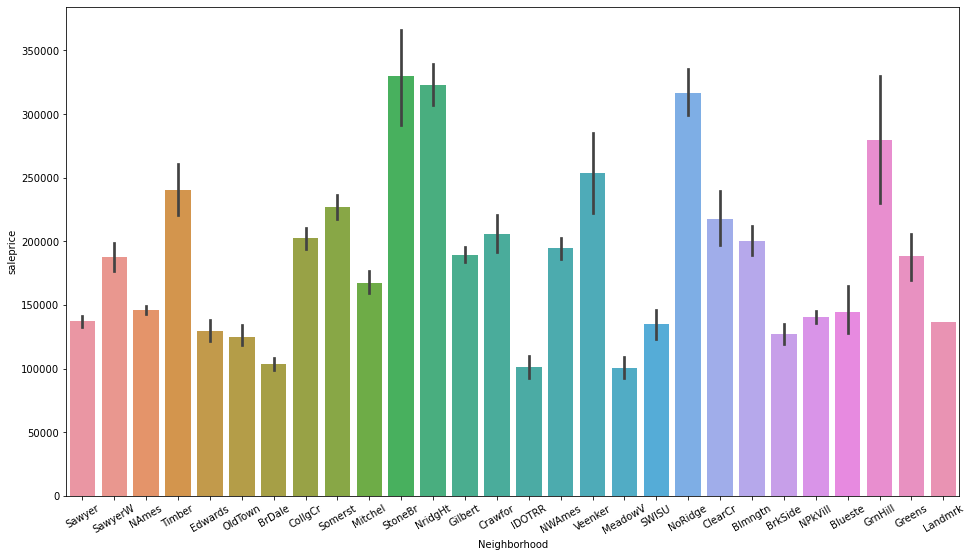

In [40]:
## visualization between cat variables and sale price
plt.figure(figsize=(16,9))
ax= sns.barplot(x=categorical_df['Neighborhood'], y=final_num_features['saleprice'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [41]:
def box_visual(col_name):
    plt.figure(figsize=(9,9))
    ax= sns.barplot(x=categorical_df[col_name], y=final_num_features['saleprice'])
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return ax;

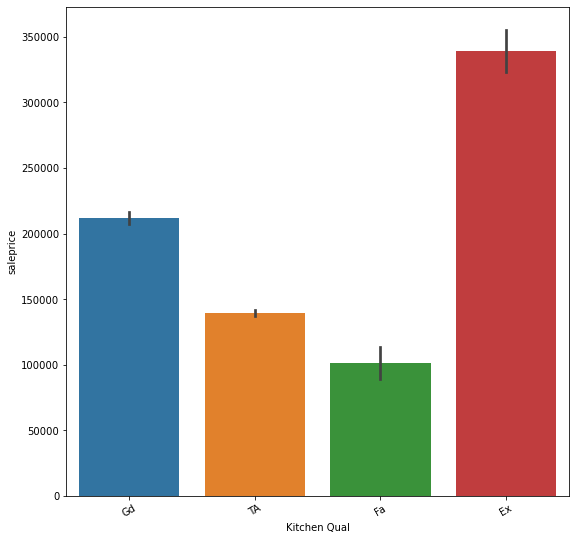

In [42]:
box_visual('Kitchen Qual');

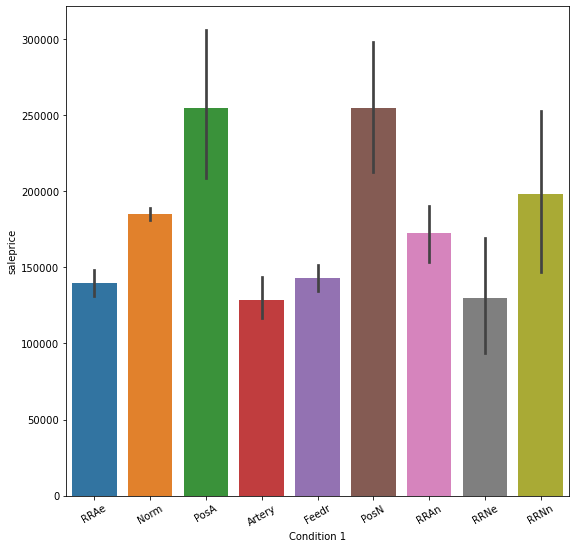

In [43]:
box_visual('Condition 1');

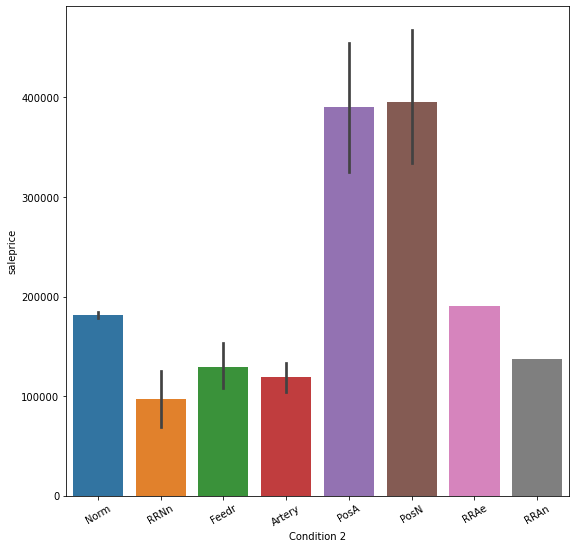

In [44]:
box_visual('Condition 2');

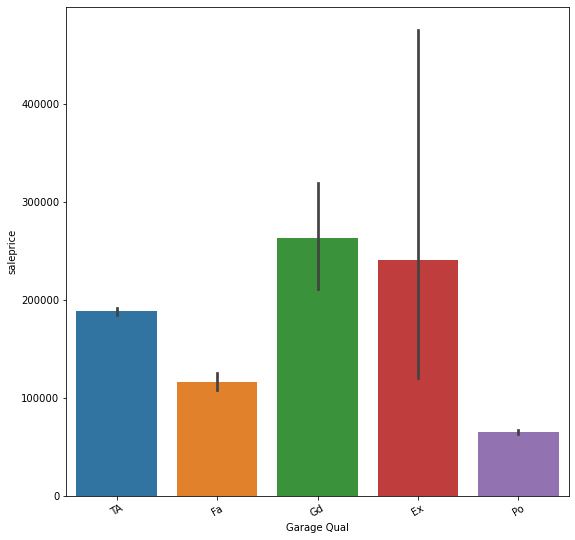

In [45]:
box_visual('Garage Qual');

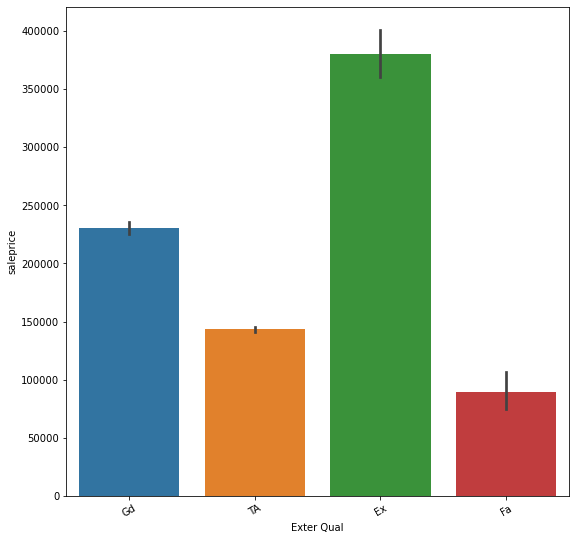

In [46]:
box_visual('Exter Qual');

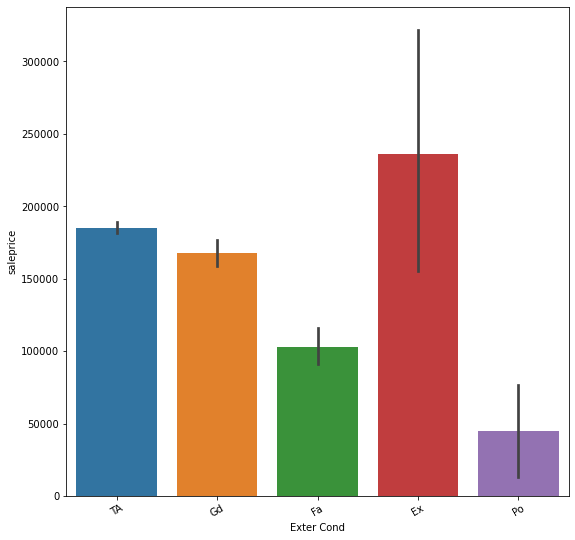

In [47]:
box_visual('Exter Cond');

In [48]:
## encoding only some of the categorical variables
## renaming only the columns that I'm going to encode

categorical_df.columns = map(str.lower, categorical_df.columns)
categorical_df.columns = categorical_df.columns.str.replace(' ','_')

In [79]:
cat_subset_df = categorical_df[['kitchen_qual', 'exter_qual', 'exter_cond','garage_qual','condition_1', 'neighborhood']]

In [80]:
cat_subset_df.head()

,kitchen_qual,exter_qual,exter_cond,garage_qual,condition_1,neighborhood
Id,,,,,,
109,Gd,Gd,TA,TA,RRAe,Sawyer
544,Gd,Gd,TA,TA,Norm,SawyerW
153,Gd,TA,Gd,TA,Norm,NAmes
318,TA,TA,TA,TA,Norm,Timber
255,TA,TA,TA,TA,Norm,SawyerW


In [81]:
cat_subset_df = pd.get_dummies(cat_subset_df, drop_first = True)

#### Joining the numerica dataframe with the dummy encoded cat dataframe

In [82]:
complete_train_df = final_num_features.join(cat_subset_df)

In [83]:
complete_train_df.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,6,1976,2005,289.0,725.0,725,1479,2,6,1976.0,...,0,0,0,0,1,0,0,0,0,0
544,7,1996,1997,132.0,913.0,913,2122,2,8,1997.0,...,0,0,0,0,0,1,0,0,0,0
153,5,1953,2007,0.0,1057.0,1057,1057,1,5,1953.0,...,0,0,0,0,0,0,0,0,0,0
318,5,2006,2007,0.0,384.0,744,1444,2,7,2007.0,...,0,0,0,0,0,0,0,0,1,0
255,6,1900,1993,0.0,676.0,831,1445,2,6,1957.0,...,0,0,0,0,0,1,0,0,0,0


### Cleaning the testing data

In [54]:
test_ames.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


Fixing column names

In [56]:
## making column names lowercase
test_ames.columns = map(str.lower, test_ames.columns)

## replacing whitespace with underscore in column name
test_ames.columns = test_ames.columns.str.replace(' ','_')

#### Creating a df with the same features as the training set

In [91]:
feats = ['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath',
       'totrms_abvgrd', 'garage_yr_blt', 'garage_cars', 'garage_area', 'kitchen_qual', 
         'exter_qual', 'exter_cond','garage_qual','condition_1', 'neighborhood']

In [92]:
test_df = test_ames[feats].copy()

test_df.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area,kitchen_qual,exter_qual,exter_cond,garage_qual,condition_1,neighborhood
Id,,,,,,,,,,,,,,,,,,
2658,6,1910,1950,0.0,1020,908,1928,2,9,1910.0,1,440,Fa,TA,Fa,Po,Norm,OldTown
2718,5,1977,1977,0.0,1967,1967,1967,2,10,1977.0,2,580,TA,TA,TA,TA,Norm,Sawyer
2414,7,2006,2006,0.0,654,664,1496,2,7,2006.0,2,426,Gd,Gd,TA,TA,Norm,Gilbert
1989,5,1923,2006,0.0,968,968,968,1,5,1935.0,2,480,TA,Gd,TA,Fa,Norm,OldTown
625,6,1963,1963,247.0,1394,1394,1394,1,6,1963.0,2,514,TA,TA,TA,TA,Norm,NAmes


In [93]:
test_df.describe()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area
count,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000
mean,6.050114,1970.492027,1984.417995,106.236032,1034.357631,1145.787016,1496.914579,1.539863,6.454442,1976.759904,1.742597,470.362187
std,1.369065,30.395895,20.450725,187.158908,413.446291,375.264111,506.468967,0.559060,1.596632,25.689763,0.750391,212.734075
min,2.000000,1880.000000,1950.000000,0.000000,0.000000,407.000000,407.000000,0.000000,3.000000,1900.000000,0.000000,0.000000
25%,5.000000,1954.000000,1967.000000,0.000000,789.000000,864.000000,1114.000000,1.000000,5.000000,1960.000000,1.000000,322.500000
50%,6.000000,1972.000000,1992.000000,0.000000,975.000000,1063.000000,1436.000000,2.000000,6.000000,1978.000000,2.000000,473.000000
75%,7.000000,1999.750000,2003.000000,172.000000,1247.000000,1358.000000,1779.000000,2.000000,7.000000,2001.000000,2.000000,576.000000
max,10.000000,2010.000000,2010.000000,1378.000000,2630.000000,2674.000000,4476.000000,4.000000,12.000000,2010.000000,4.000000,1488.000000


In [94]:
## deleting rows where the garage living area is above 4000
test_df[test_df['gr_liv_area'] > 4000]

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,garage_cars,garage_area,kitchen_qual,exter_qual,exter_cond,garage_qual,condition_1,neighborhood
Id,,,,,,,,,,,,,,,,,,
1761,10,1996,1996,0.0,2396,2411,4476,3,10,1996.0,3,813,Ex,Gd,TA,TA,Norm,NoRidge
1768,10,1994,1995,1170.0,2444,2444,4316,3,10,1994.0,3,832,Ex,Ex,TA,TA,Norm,NoRidge


In [95]:
test_df.drop(index =[1761,1768], axis = 0, inplace=True)

Imputing missing values

In [96]:
missing_values(test_df)

['mas_vnr_area', 'garage_yr_blt', 'garage_qual']

In [97]:
mean_vnr_area = test_df['mas_vnr_area'].mean()

In [98]:
mean_grg_yr = test_df['garage_yr_blt'].mean()

In [99]:
test_df['mas_vnr_area'].fillna(mean_vnr_area, inplace=True)
test_df['garage_yr_blt'].fillna(mean_grg_yr, inplace=True)

Creating dummy colummns for the categorical data

In [100]:
test_df = pd.get_dummies(data = test_df, columns=['kitchen_qual', 
         'exter_qual', 'exter_cond','garage_qual','condition_1', 'neighborhood'],drop_first=True)

In [101]:
test_df.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
2658,6,1910,1950,0.0,1020,908,1928,2,9,1910.0,...,0,0,1,0,0,0,0,0,0,0
2718,5,1977,1977,0.0,1967,1967,1967,2,10,1977.0,...,0,0,0,0,1,0,0,0,0,0
2414,7,2006,2006,0.0,654,664,1496,2,7,2006.0,...,0,0,0,0,0,0,0,0,0,0
1989,5,1923,2006,0.0,968,968,968,1,5,1935.0,...,0,0,1,0,0,0,0,0,0,0
625,6,1963,1963,247.0,1394,1394,1394,1,6,1963.0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
## checking to see what columns are in train set but not in test set
set(complete_train_df) - set(test_df)

{'saleprice'}

In [104]:
## dropping columns in train set that aren't in test set
complete_train_df.drop(columns=['garage_qual_Fa', 'neighborhood_GrnHill', 'neighborhood_Landmrk'], inplace= True)

#### Saving the final testing and training dataframes

In [105]:
complete_train_df.to_csv('complete_train_df')
test_df.to_csv('complete_test_df')